# Multiple learning curves


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from srcs.modules.optimizer import SGD, Adam

from srcs.modules.functions import Softmax, np_log, numerical_gradient
from srcs.modules.activation import ReLU, Sigmoid
from srcs.modules.loss import CrossEntropyLoss
from srcs.modules.init import he_normal, xavier_normal, normal

from srcs.modules.layer import Dense
from srcs.modules.model import Sequential
from srcs.modules.plot import plot_multiple_models
from srcs.dataloader import get_wdbc
from srcs.train import train_model, create_model
from srcs import train

seed = 42


train Normalize

Metrics: 
 Train [Accuracy:0.9868, Precision:1.0000, Recall:0.9647, F1:0.9820]
 Valid [Accuracy:0.9558, Precision:0.9302, Recall:0.9524, F1:0.9412]

train Default

Metrics: 
 Train [Accuracy:0.9627, Precision:0.9636, Recall:0.9353, F1:0.9493]
 Valid [Accuracy:0.9381, Precision:0.9730, Recall:0.8571, F1:0.9114]


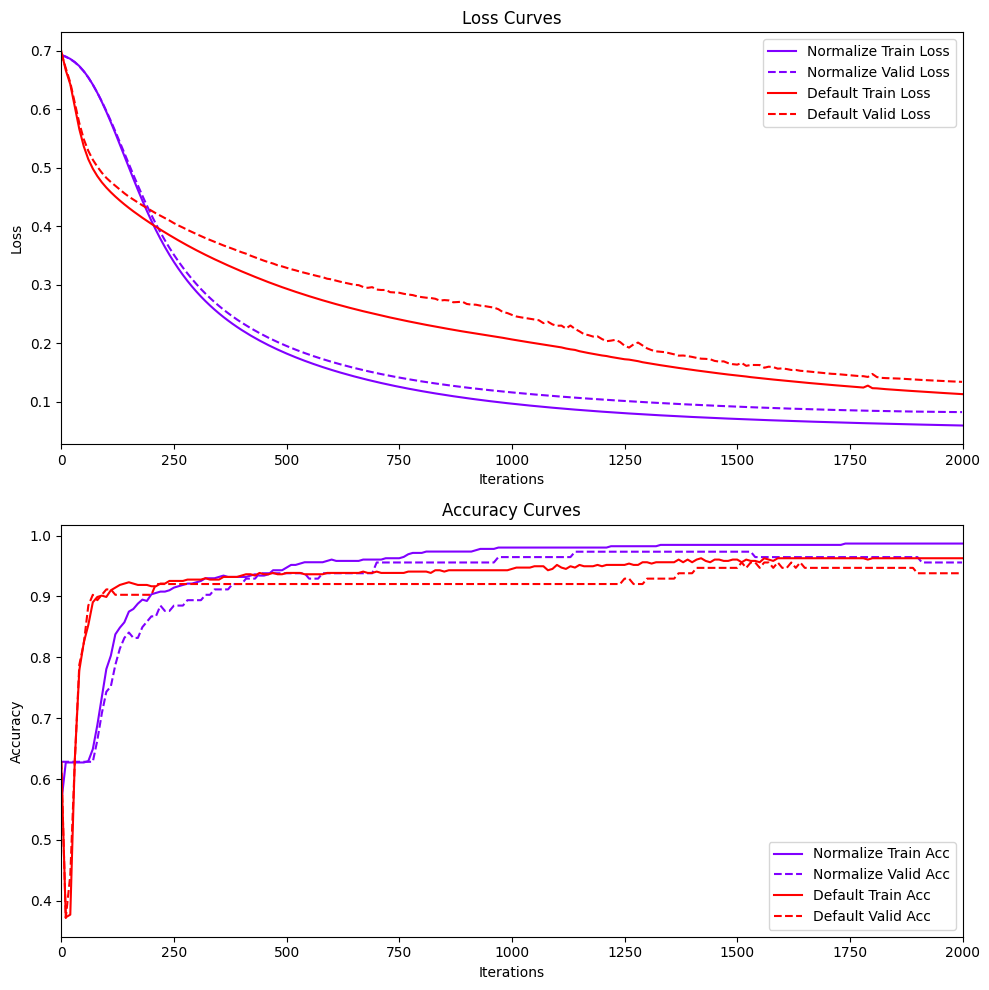

In [3]:

max_itr = 2000
models_results = []
for apply_normalize in [True, False]:
    if apply_normalize:
        name = "Normalize"
    else:
        name = "Default"

    X_train, X_valid, t_train, t_valid = get_wdbc(
        csv_path="../data/data.csv",
        train_size=0.8,
        apply_normalize=apply_normalize
    )

    model = Sequential(
        layers=[
            Dense(in_features=30, out_features=5, activation=ReLU, init_method=normal, seed=seed),
            Dense(in_features=5, out_features=2, activation=Softmax, init_method=normal, seed=seed)
        ],
        criteria=CrossEntropyLoss,
        optimizer=Adam(lr=0.001),
    )

    print(f"\ntrain {name}")
    iterations, train_losses, train_accs, valid_losses, valid_accs = train_model(
        model=model,
        X_train=X_train,
        t_train=t_train,
        X_valid=X_valid,
        t_valid=t_valid,
        iters_num=max_itr,
        verbose=False,
        plot=False,
        metrics_interval=10,
        name="WDBC"
    )

    models_results.append({
        'name'          : name,
        'iterations'    : iterations,
        'train_losses'  : train_losses,
        'train_accs'    : train_accs,
        'valid_losses'  : valid_losses,
        'valid_accs'    : valid_accs
    })


plot_multiple_models(max_itr, models_results)
